# Landuse in Christchurch

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 2.7 MB/s eta 0:00:00


In [3]:
import osmnx as ox
import pandas as pd
import geopandas as gpd

# setting blanket crs
crs = 'EPSG:2124'


In [4]:
# defining christchurch boundary
christchurch = 'Christchurch, New Zealand'

# Check boundary is correct
chc = ox.geocode_to_gdf(christchurch)
chc = chc.to_crs(crs)

## Creating Greenspace dataframe

In [5]:
# choosing tags from OSM that represent all kinds of greenspace
greenspace_tags = {'landuse':['flowerbed','forest',
                              'greenhouse_horticulture',
                              'meadow','orchard',
                              'plant_nursery','vineyard',
                              'grass','greenfield','village_green'],
                   'leisure':['dog_park','garden','golf_course',
                              'nature_reserve','park','pitch']
                  }

In [6]:
# getting green space from OSM, assigning crs and removing points
greenspace = ox.features_from_place(christchurch, tags=greenspace_tags)
greenspace_gdf = greenspace.to_crs(crs)
greenspace_gdf = greenspace_gdf[greenspace_gdf.geometry.type != 'Point']
greenspace_gdf = greenspace_gdf.drop(columns=['nodes','ways'])

# saving to geopackage
greenspace_gdf.to_file('/content/drive/MyDrive/FinalProject/Data/Landuse-data/Christchurch/greenspace.gpkg', driver='GPKG')

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp

## Creating brownfield data frame

In [7]:
brownfield_tags = {'landuse':'brownfield'}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# getting green space from OSM, assigning crs and removing points
brownfields = ox.features_from_place(christchurch, tags=brownfield_tags)
brownfields_gdf = brownfields.to_crs(crs)
brownfields_gdf = brownfields_gdf[brownfields_gdf.geometry.type != 'Point']
brownfields_gdf = brownfields_gdf.drop(columns=['nodes'])

# saving to geopackage
brownfields_gdf.to_file('/content/drive/MyDrive/FinalProject/Data/Landuse-data/Christchurch/brownfields.gpkg', driver='GPKG')

## Creating building footprint dataframe

In [9]:
buildings = ox.features_from_place(christchurch, tags={'building':True})
buildings_gdf = buildings.to_crs(crs)
buildings_gdf = buildings_gdf[buildings_gdf.geometry.type != 'Point']
buildings_gdf = buildings_gdf.drop(columns=['nodes'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
buildings_gdf.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:

amenity female wheelchair  \
element_type osmid                                 
way          4830813   theatre    NaN        NaN   
             4874174       NaN    NaN        NaN   
             22779675  parking    NaN        NaN   
             23504319      NaN    NaN        NaN   
             23504325      NaN    NaN        NaN   

                                                                geometry  \
element_type osmid                                                         
way          4830813   POLYGON ((392561.585 807084.271, 392598.659 80...   
             4874174   POLYGON ((386528.125 809671.308, 386542.912 80...   
             22779675  POLYGON ((392551.936 806329.992, 392563.737 80...   
             23504319  POLYGON ((385123.479 811184.339, 385134.915 81...   
             23504325  POLYGON ((385092.750 811136.419, 385111.671 81...   

                      building historic                          name bench  \
element_type osmid                                                            
way          4830813       yes      NaN        Christchurch Town Hall   NaN   
             4874174       yes      NaN  Burnside Rugby Football Club   NaN   
             22779675  parking      NaN      Lichfield Street Carpark   NaN   
             23504319      yes      NaN                           NaN   NaN   
             23504325      yes      NaN                           NaN   NaN   

                       bin shelter_type  ... pumping_station  \
element_type osmid                       ...                   
way          4830813   NaN          NaN  ...             NaN   
             4874174   NaN          NaN  ...             NaN   
             22779675  NaN          NaN  ...             NaN   
             23504319  NaN          NaN  ...             NaN   
             23504325  NaN          NaN  ...             NaN   

                      abandoned:building highchair residential street_vendor  \
element_type osmid                                                             
way          4830813                 NaN       NaN         NaN           NaN   
             4874174                 NaN       NaN         NaN           NaN   
             22779675                NaN       NaN         NaN           NaN   
             23504319                NaN       NaN         NaN           NaN   
             23504325                NaN       NaN         NaN           NaN   

                      ways type origin restaurant max_level  
element_type osmid                                           
way          4830813   NaN  NaN    NaN        NaN       NaN  
             4874174   NaN  NaN    NaN        NaN       NaN  
             22779675  NaN  NaN    NaN        NaN       NaN  
             23504319  NaN  NaN    NaN        NaN       NaN  
             23504325  NaN  NaN    NaN        NaN       NaN  

[5 rows x 383 columns]

### Buildings to city blocks

In [11]:
import geopandas as gpd
city_blocks = gpd.read_file('/content/drive/MyDrive/FinalProject/Data/city-blocks/Christchurch/city-blocks.gpkg')

# removing unecessary columns
city_blocks = city_blocks.drop(columns=['level_0', 'level_1'])
city_blocks["contains_building"] = False
city_blocks = city_blocks.reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# checking if each city block contains more than 50 percent building coverage

# intersection of city blocks and buildings
intersections = gpd.overlay(city_blocks, buildings_gdf, how='intersection')

# Calculate the area of each intersection
intersections['intersection_area'] = intersections['geometry'].area

# city block area
city_blocks['block_area'] = city_blocks['geometry'].area

# Calculate the total area of building footprints
total_building_area = buildings_gdf['geometry'].unary_union.area

# Calculate the percentage of each city block covered by buildings
intersections_grouped = intersections.groupby('index')['intersection_area'].sum().reset_index()
city_blocks = city_blocks.merge(intersections_grouped, on='index', how='left')
city_blocks['building_coverage_percentage'] = (city_blocks['intersection_area'] / city_blocks['block_area']) * 100

# Create a new dataframe for built-up areas based on the threshold
threshold = 70
built_up_areas = city_blocks[city_blocks['building_coverage_percentage'] >= threshold]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# saving to geopackage
built_up_areas.to_file('/content/drive/MyDrive/FinalProject/Data/Landuse-data/Christchurch/built_up_areas.gpkg', driver='GPKG')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Locating publicly accessible parks

In [16]:
# Locating all of the parks in Christchurch
parks = ox.features_from_place(christchurch, tags={'leisure':'park'})
parks_gdf = parks.to_crs(crs)

# showing only parks that are not private according to OSM. There are two locations that are tagged as private
public_parks_gdf = parks_gdf[parks_gdf['access'] != 'private']
public_parks_gdf = public_parks_gdf[public_parks_gdf.geometry.type != 'Point']
public_parks_gdf = public_parks_gdf.drop(columns=['nodes', 'ways'])

# saving to geopackage
public_parks_gdf.to_file('/content/drive/MyDrive/FinalProject/Data/Landuse-data/Christchurch/public-parks.gpkg', driver='GPKG')

### Static Visualisation

Text(0.5, 1.0, 'Christchurch City')

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


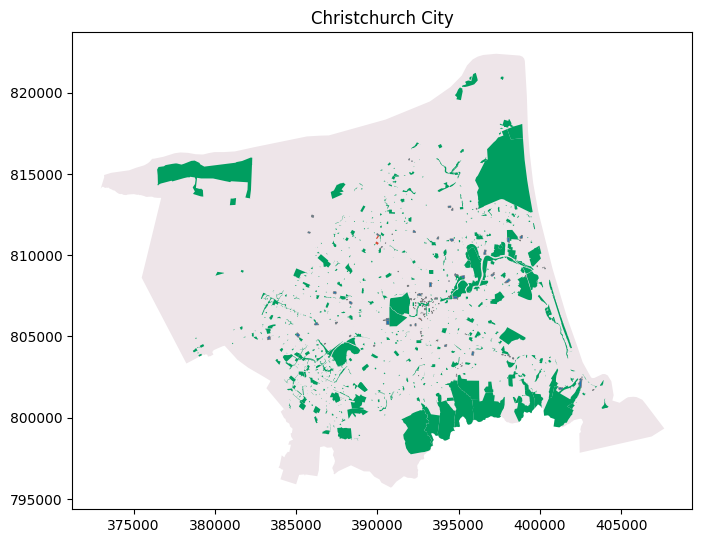

In [17]:
# Visualise in a single figure all the OSM data that was foud:
# Create a figure and an axis for plotting, and set the figure size
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))

# Plot each of the GeoDataFrames on the plotting axis to ensure they are all on the same figure
# Plot the 'area' GeoDataFrame with black face color
chc.plot(ax=ax, facecolor="#EEE5E9")

# edges geodataframe
brownfields_gdf.plot(ax=ax, linewidth=0.5, edgecolor="#7C7C7C", label='Brownfields')

# hospitals geodataframe
built_up_areas.plot(ax=ax, facecolor="#D64933", label='High Density')

# public parks
public_parks_gdf.plot(ax=ax, facecolor='#009E60', label='Parks')

# private parks

#plt.legend()
ax.set_title('Christchurch City')
#ax.legend()